In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import glob
import random

In [2]:
def prepro(img):
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   

    # Convert to HSV image
    hsvImg = cv2.cvtColor(blurImg, cv2.COLOR_BGR2HSV)  

    # Create mask (parameters - green color range)
    lower_green = (25, 40, 50)
    upper_green = (75, 255, 255)
    mask = cv2.inRange(hsvImg, lower_green, upper_green)  
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # Create bool mask
    bMask = mask > 0  

    # Apply the mask
    clear = np.zeros_like(img, np.uint8)  # Create empty image
    clear[bMask] = img[bMask]  # Apply boolean mask to the origin image
    return clear

3582
2180
3608


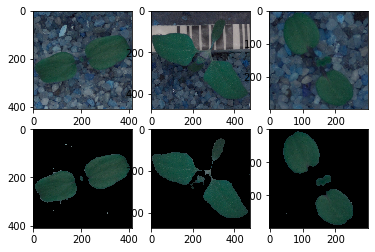

In [4]:
path = '/home/dulanj/Projects/Kaggle/Plant-Seed/plant-seedlings-classification/train/*/*.png' 
files = glob.glob(path)

samples = 3
for i in range(samples):
    random_number = random.randint(0, len(files))
    print(random_number)
    img = cv2.imread(files[random_number])
    pre_image = prepro(img)


    plt.subplot(2, samples, 1 + i); plt.imshow(img)
    plt.subplot(2, samples, 1 + i + samples); plt.imshow(pre_image)